In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_path = '/content/drive/MyDrive/BN.zip'

In [ ]:
import zipfile

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/destination_folder4')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
data_gen=ImageDataGenerator(rescale=1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

In [ ]:
data_path="destination_folder1"

train_gen=data_gen.flow_from_directory(data_path + '/train1',
                                             target_size=(224,224),
                                             batch_size=64,
                                             class_mode='categorical')
val_datagen = ImageDataGenerator(rescale = 1./255)
val_gen=val_datagen.flow_from_directory(data_path + '/valid1',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=False)

Found 5756 images belonging to 2 classes.
Found 1241 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications.resnet_v2 import ResNet101V2, preprocess_input

model = Sequential([
    ResNet101V2(include_top=False,
                weights='imagenet',
                pooling='avg'),
    Dense(2, kernel_regularizer=l2(0.01), activation='relu')
])

model.layers[0].trainable = False


171317808/171317808 [==============================] - 9s 0us/step


In [ ]:
opt=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)


In [ ]:
model.compile(optimizer = opt,
              loss='squared_hinge',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 42630658 (162.62 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
history = model.fit(x=train_gen, validation_data=val_gen, epochs=12)

Epoch 1/12
90/90 [==============================] - 148s 1s/step - loss: 0.9741 - accuracy: 0.6487 - val_loss: 0.8366 - val_accuracy: 0.8662
Epoch 2/12
90/90 [==============================] - 110s 1s/step - loss: 0.8255 - accuracy: 0.9098 - val_loss: 0.8204 - val_accuracy: 0.9162
Epoch 3/12
90/90 [==============================] - 132s 1s/step - loss: 0.8029 - accuracy: 0.9312 - val_loss: 0.8096 - val_accuracy: 0.9251
Epoch 4/12
90/90 [==============================] - 109s 1s/step - loss: 0.7975 - accuracy: 0.9378 - val_loss: 0.8088 - val_accuracy: 0.9339
Epoch 5/12
90/90 [==============================] - 110s 1s/step - loss: 0.7919 - accuracy: 0.9421 - val_loss: 0.7986 - val_accuracy: 0.9347
Epoch 6/12
90/90 [==============================] - 110s 1s/step - loss: 0.7854 - accuracy: 0.9449 - val_loss: 0.8081 - val_accuracy: 0.9428
Epoch 7/12
90/90 [==============================] - 109s 1s/step - loss: 0.7840 - accuracy: 0.9451 - val_loss: 0.8013 - val_accuracy: 0.9420
Epoch 8/12
90

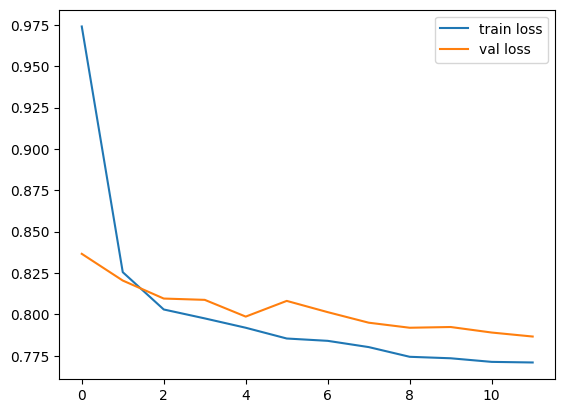

In [ ]:
# plot the losses
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')


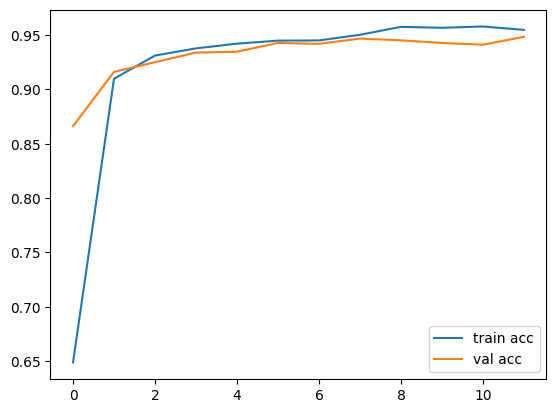

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [ ]:
path = '/content/drive/MyDrive/resnet101V2.h5'

# Save the model
model.save(path)

print("Model saved at:",path)


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at: /content/drive/MyDrive/resnet101V2new.h5


In [ ]:
from tensorflow.keras.models import load_model
model=load_model(path)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 42630658 (162.62 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 42626560 (162.61 MB)
_________________________________________________________________


In [ ]:
data_path ="destination_folder1"

test_datagen= ImageDataGenerator(rescale=1./255)

test_gen = test_datagen.flow_from_directory(data_path + '/test1',
                                              target_size=(224,224),
                                              batch_size=1,
                                              class_mode='categorical',
                                              shuffle=False)


Found 1246 images belonging to 2 classes.


In [ ]:
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)

1246/1246 [==============================] - 23s 17ms/step


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       540
           1       0.95      0.95      0.95       706

    accuracy                           0.95      1246
   macro avg       0.95      0.95      0.95      1246
weighted avg       0.95      0.95      0.95      1246



Text(0.5, 1.0, 'Confusion matrix of model')

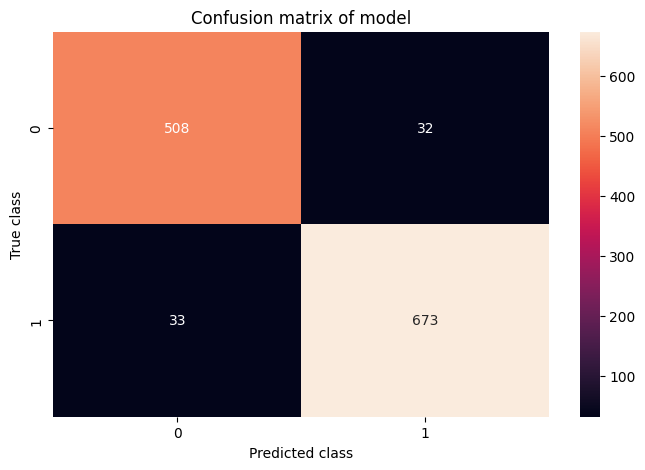

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cf_matrix = confusion_matrix(test_gen.classes, y_pred)
import seaborn as sns
plt.figure(figsize=(8,5))
heatmap = sns.heatmap(cf_matrix, annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of model')

In [ ]:
accuracy_score(test_gen.classes, y_pred)

0.9478330658105939

In [ ]:
from google.colab.patches import cv2_imshow


1/1 [==============================] - 2s 2s/step


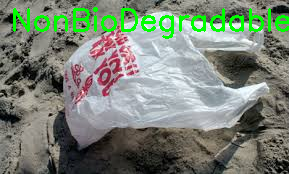

In [ ]:
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

# Load the saved model
path = '/content/drive/MyDrive/resnet101V2.h5'
loaded_model = tf.keras.models.load_model(path)

# Function to preprocess input image
def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (224, 224))  # Resize to match ResNet input size
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR to RGB
    img = tf.keras.applications.resnet_v2.preprocess_input(img)  # Preprocess input
    return img

# Path to the input image
image_path = '/content/destination_folder4/test1/NonBioDegradable/R_433.jpg'

# Preprocess the input image
input_image = preprocess_image(image_path)

# Make prediction on the input image
predictions = loaded_model.predict(np.expand_dims(input_image, axis=0))

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Define your class labels
class_labels = ["BioDegradable", "NonBioDegradable"]

# Get the predicted class label
predicted_class = class_labels[predicted_class_index]

# Display the input image with predicted class label
input_image_display = cv2.imread(image_path)
cv2.putText(input_image_display, predicted_class, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2_imshow(input_image_display)


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
import pandas as pd

# Load the pretrained model
model = load_model("/content/drive/MyDrive/resnet101V2new.h5")

In [ ]:
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 89.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.1 MB/s eta 0:00:00


In [ ]:
import torch
import torchvision.transforms as transforms
import cv2
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from google.colab.patches import cv2_imshow

# Load the pre-trained model
model = fasterrcnn_resnet50_fpn(pretrained=True, progress=True)
model.eval()

# Class labels for COCO dataset
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def detect_objects(image_path, display_fn=cv2_imshow):
    # Load image using OpenCV
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_pil = Image.fromarray(image_rgb)

    # Transform image for model input
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image_pil)

    # Perform object detection
    with torch.no_grad():
        predictions = model([image_tensor])

    # Draw bounding boxes on the image
    for box, score, label in zip(predictions[0]['boxes'], predictions[0]['scores'], predictions[0]['labels']):
        box = [int(i) for i in box]
        cv2.rectangle(image_rgb, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)
        cv2.putText(image_rgb, COCO_INSTANCE_CATEGORY_NAMES[label], (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    # Display the image with bounding boxes
    display_fn(image_rgb)

# Call the function to detect objects and draw bounding boxes on the image
detect_objects('/content/frame_000264_PNG.rf.12fe363f3dfc6e5932dd09e980e9c087.jpg')


NameError: name '_C' is not defined